# Project Adult

### age: continuous.

### workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

### fnlwgt: continuous.

### education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

### education-num: continuous.

### marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

### occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

### relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

### race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

### sex: Female, Male.

### capital-gain: continuous.

### capital-loss: continuous.

### hours-per-week: continuous.

### native-country: United-States, Cambodia, England, ...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.metrics import  *
from sklearn.preprocessing import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn import preprocessing

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage'],
      dtype='object')

In [5]:
df['wage'].value_counts()

wage
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

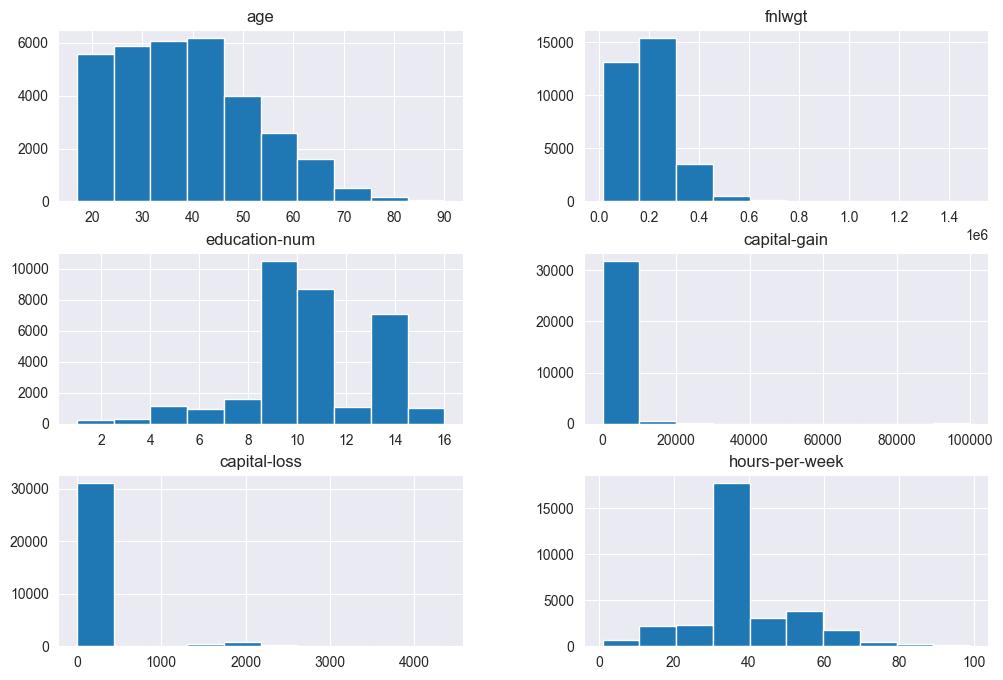

In [8]:
df.hist(figsize=(12,8))

<Axes: xlabel='education-num', ylabel='hours-per-week'>

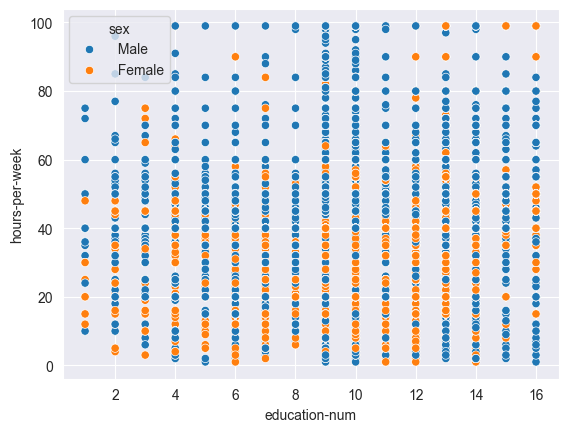

In [9]:
sns.scatterplot(data = df, x='education-num', y='hours-per-week', hue='sex')

<Axes: ylabel='count'>

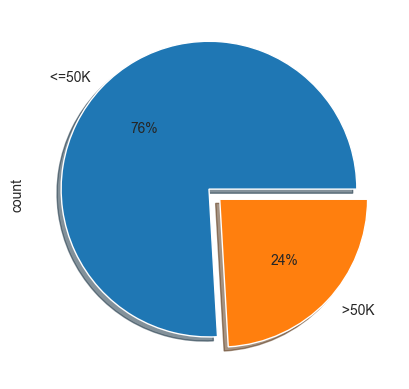

In [10]:
df['wage'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#1f77b4', '#ff7f0e'], shadow=True, explode=(0.05, 0.05))

<Axes: ylabel='count'>

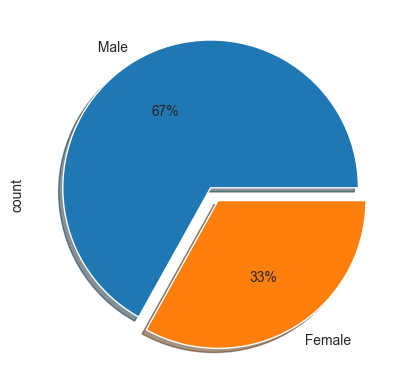

In [11]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#1f77b4', '#ff7f0e'], shadow=True, explode=(0.05, 0.05))

In [12]:
df['sex']

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: sex, Length: 32561, dtype: object

## Which sex has better wage

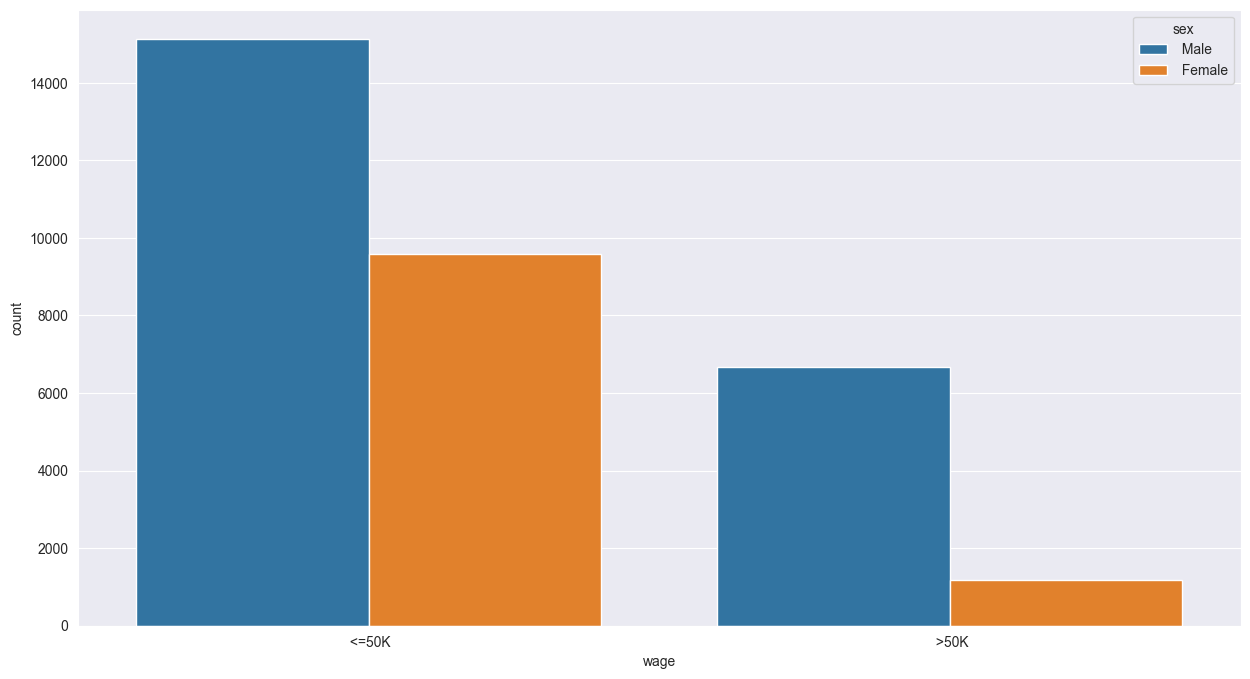

In [13]:

fig = plt.figure(figsize=(15,8))
sns.countplot(data=df, x="wage", hue="sex")
plt.show()

## Which school title has better salaries

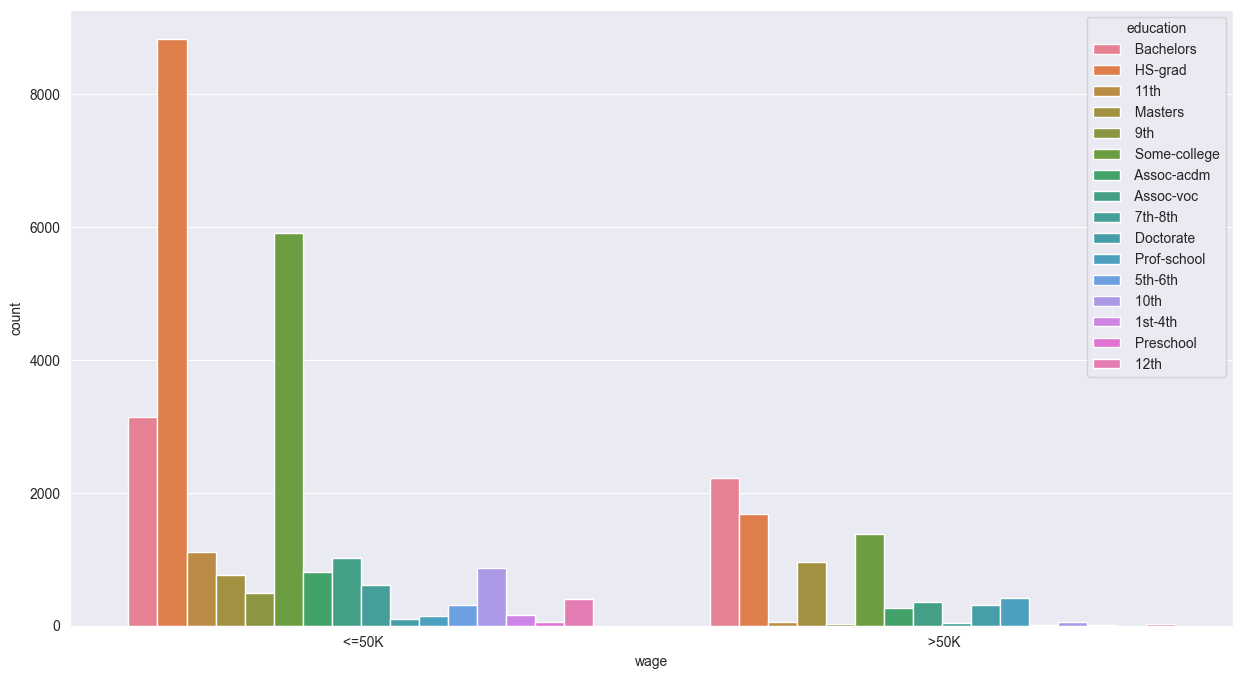

In [14]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data=df, x="wage", hue="education")
plt.show()

## Which job has better salaries

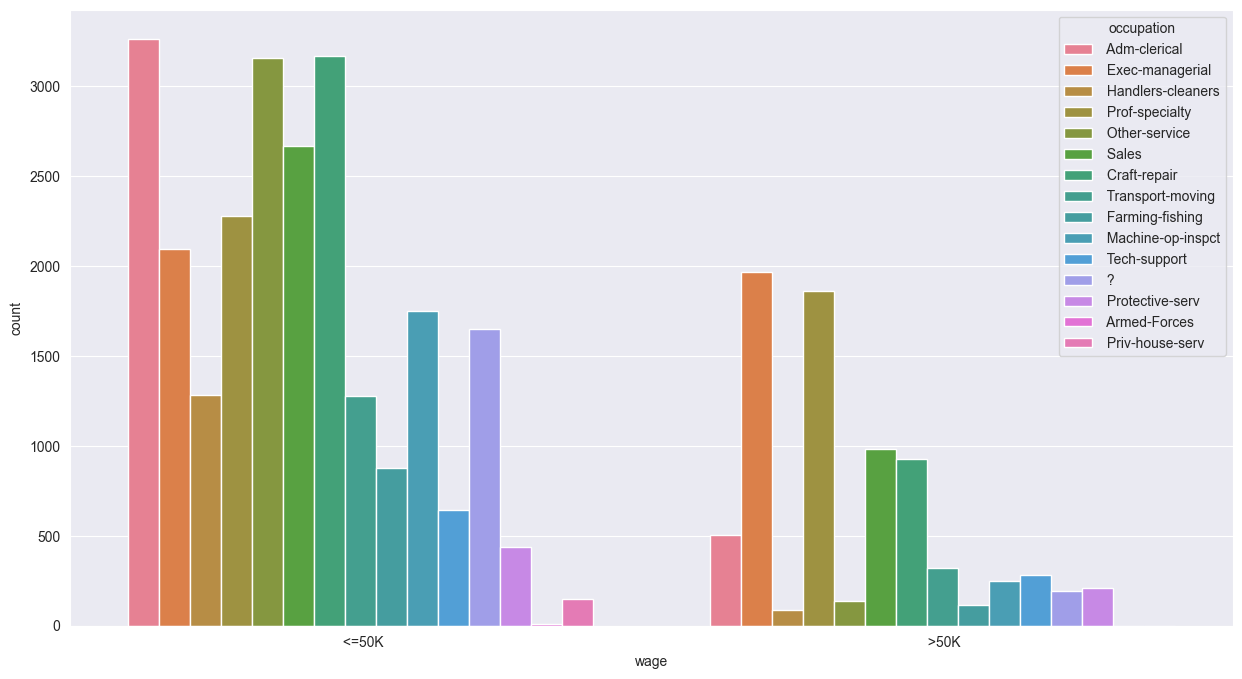

In [15]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data=df, x="wage", hue="occupation")
plt.show()

## Which race has better wage

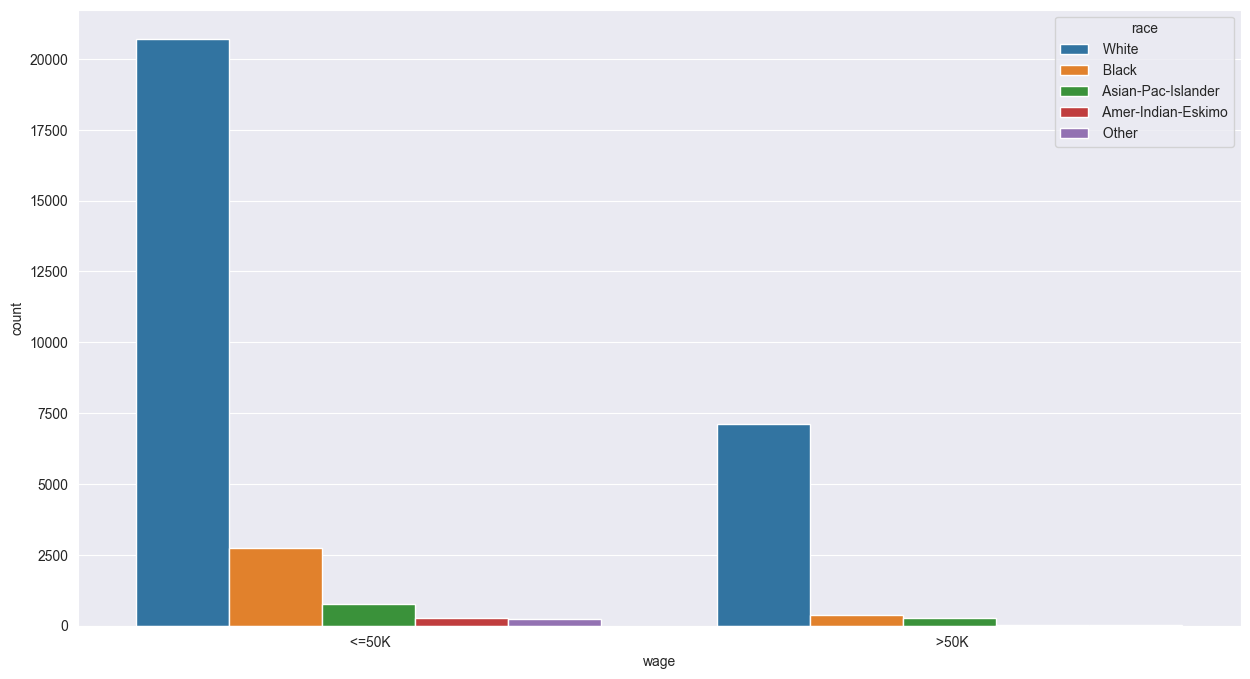

In [16]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data=df, x="wage", hue="race")
plt.show()

In [17]:
# encode data via get_dummies
label_encoder = LabelEncoder()

df_encoded = df.copy()
df_encoded['workclass'] = label_encoder.fit_transform(df['workclass'])
df_encoded['education'] = label_encoder.fit_transform(df['education'])
df_encoded['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df_encoded['occupation'] = label_encoder.fit_transform(df['occupation'])
df_encoded['relationship'] = label_encoder.fit_transform(df['relationship'])
df_encoded['race'] = label_encoder.fit_transform(df['race'])
df_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_encoded['native-country'] = label_encoder.fit_transform(df['native-country'])
df_encoded['wage'] = label_encoder.fit_transform(df['wage'])
# df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])


# scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

df_encoded['hours-per-week'] = standard_scaler.fit_transform(df_encoded[['hours-per-week']])
df_encoded['education-num'] = standard_scaler.fit_transform(df_encoded[['education-num']])
df_encoded['age'] = standard_scaler.fit_transform(df_encoded[['age']])
df_encoded['fnlwgt'] = standard_scaler.fit_transform(df_encoded[['fnlwgt']])


df_encoded['capital-gain'] = robust_scaler.fit_transform(df_encoded[['capital-gain']])
df_encoded['capital-loss'] = robust_scaler.fit_transform(df_encoded[['capital-loss']])



df_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,2174.0,0.0,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,0.0,0.0,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,0.0,0.0,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,0.0,0.0,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,0.0,0.0,-0.035429,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,4,0,0.0,0.0,-0.197409,39,0
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,4,1,0.0,0.0,-0.035429,39,1
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,4,0,0.0,0.0,-0.035429,39,0
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,4,1,0.0,0.0,-1.655225,39,0


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()## I can see data wage data are imbalanced

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'wage'}>, <Axes: >]], dtype=object)

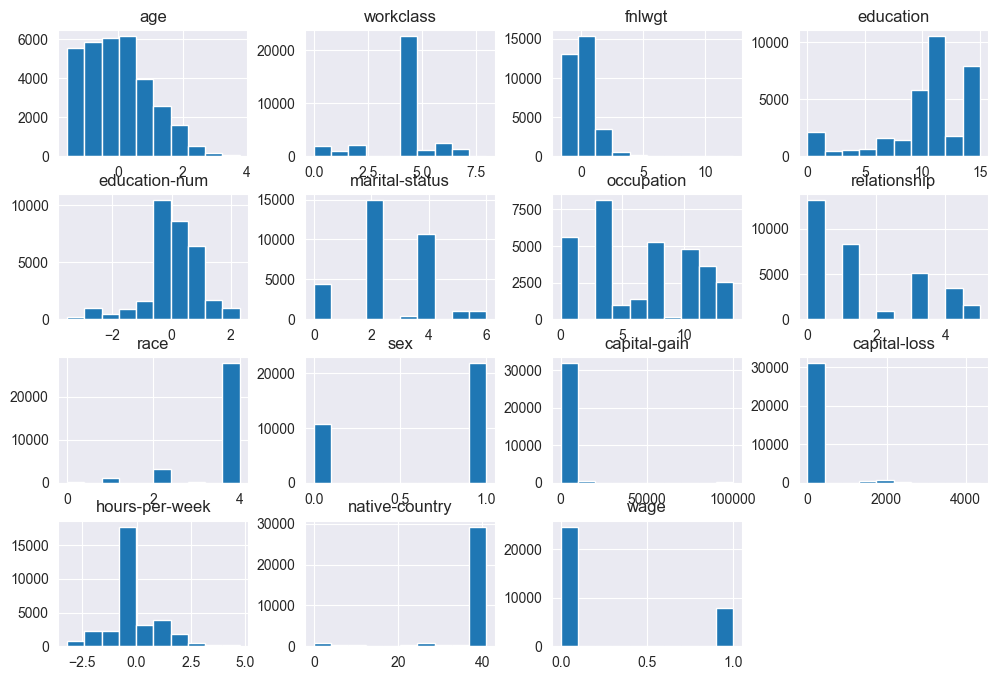

In [18]:
df_encoded.hist(figsize=(12,8))

In [19]:
import pandas as pd

def gini_index(data, target):
    """
    Calculate the Gini Index for a dataset based on the target variable.
    """
    probs = 0
    classes = data[target].unique()
    for cls in classes:
        p = data[data[target] == cls].shape[0] / data.shape[0]
        probs += p ** 2
    return 1 - probs


In [20]:
def weighted_gini_index(data, feature, target):
    """
    Calculate the weighted Gini Index for splitting the dataset on a feature.
    """
    unique_values = data[feature].unique()
    total_samples = data.shape[0]
    weighted_gini = 0
    
    for value in unique_values:
        subset = data[data[feature] == value]
        gini = gini_index(subset, target)
        weighted_gini += (subset.shape[0] / total_samples) * gini
    
    return weighted_gini


In [21]:
def find_best_split(data, features, target):
    """
    Determine the best feature to split on based on the Gini Index.
    """
    best_feature = None
    best_gini = float('inf')
    
    for feature in features:
        gini = weighted_gini_index(data, feature, target)
        if gini < best_gini:
            best_gini = gini
            best_feature = feature
    
    return best_feature, best_gini


In [22]:
target = 'wage'
features = ['race', 'age', 'education', 'sex', 'native-country','occupation']

best_feature, best_gini = find_best_split(df_encoded, features, target)
print(f"Best Feature: {best_feature}, Gini Index: {best_gini}")

Best Feature: education, Gini Index: 0.3158982617404576


## Let’s start with splitting the data into the input and output part
### Usually named as a X and y variables

### Define predictor and target variable arrays
#### x - predictor
#### y - target

In [23]:
# X, y = df_encoded.loc[:, df_encoded.columns != 'wage'], df_encoded.loc[:, 'wage']
X, y = df_encoded.loc[:, df_encoded.columns != 'wage'], df_encoded.loc[:, 'wage']

In [24]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,2174.0,0.0,-0.035429,39
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,0.0,0.0,-2.222153,39
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,0.0,0.0,-0.035429,39
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,0.0,0.0,-0.035429,39
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,0.0,0.0,-0.035429,5


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wage, dtype: int64

In [26]:
X.shape, y.shape

((32561, 14), (32561,))

## I have imbalanced data wage - oversample minory class

<Axes: >

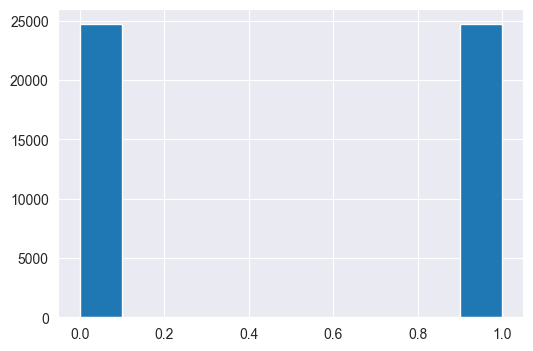

In [27]:
from imblearn.over_sampling import SMOTE

# resample data
X_resample, y_resample = SMOTE().fit_resample(X, y)
y_resample.hist(figsize=(6,4))

## Lets start with train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=13)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((39552, 14), (39552,), (9888, 14), (9888,))

## Take a look on data in variable y_test
### Can you detect how many elements of each class is represented in test split?

In [29]:
pd.Series(y_test).value_counts()

wage
0    4972
1    4916
Name: count, dtype: int64

## Create DecesionTree Classifier

In [30]:
clf = DecisionTreeClassifier(random_state=13)
clf

DecisionTreeClassifier(random_state=13)

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

## Lets train model for prediction part

In [32]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [33]:
accuracy_score(y_test, y_pred)

0.8443567961165048

In [34]:
f1_score(y_test, y_pred)

np.float64(0.8446866485013624)

In [35]:
precision_score(y_test, y_pred)

np.float64(0.8381734428199479)

In [36]:
print(export_text(clf, show_weights=True, feature_names=list(X.columns.values)))

|--- relationship <= 0.50
|   |--- education-num <= -0.42
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- education-num <= -1.19
|   |   |   |   |--- hours-per-week <= -0.03
|   |   |   |   |   |--- education <= 0.50
|   |   |   |   |   |   |--- education-num <= -1.58
|   |   |   |   |   |   |   |--- age <= -0.18
|   |   |   |   |   |   |   |   |--- hours-per-week <= -0.39
|   |   |   |   |   |   |   |   |   |--- workclass <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- workclass >  4.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- hours-per-week >  -0.39
|   |   |   |   |   |   |   |   |   |--- fnlwgt <= 1.78
|   |   |   |   |   |   |   |   |   |   |--- age <= -0.52
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [32.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- age >  -0.52
|   |   |   |   |   |   |   |   | 

<Axes: >

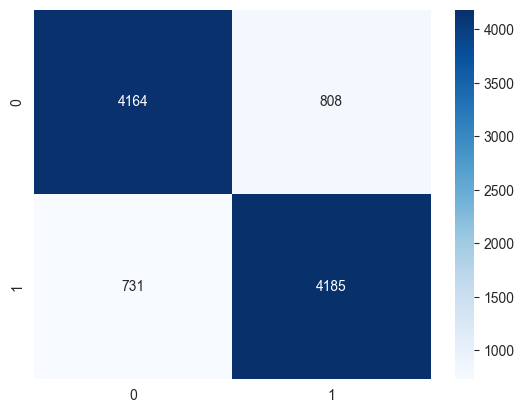

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap="Blues")

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(np.int64(4164), np.int64(808), np.int64(731), np.int64(4185))

## Hyperparameter tuning for DecesionTree

In [39]:
# max_depth - maximalne 3 vetve ve stromu
clf_tuned = DecisionTreeClassifier(random_state=0, max_depth=3)
clf_tuned = clf_tuned.fit(X_train, y_train)

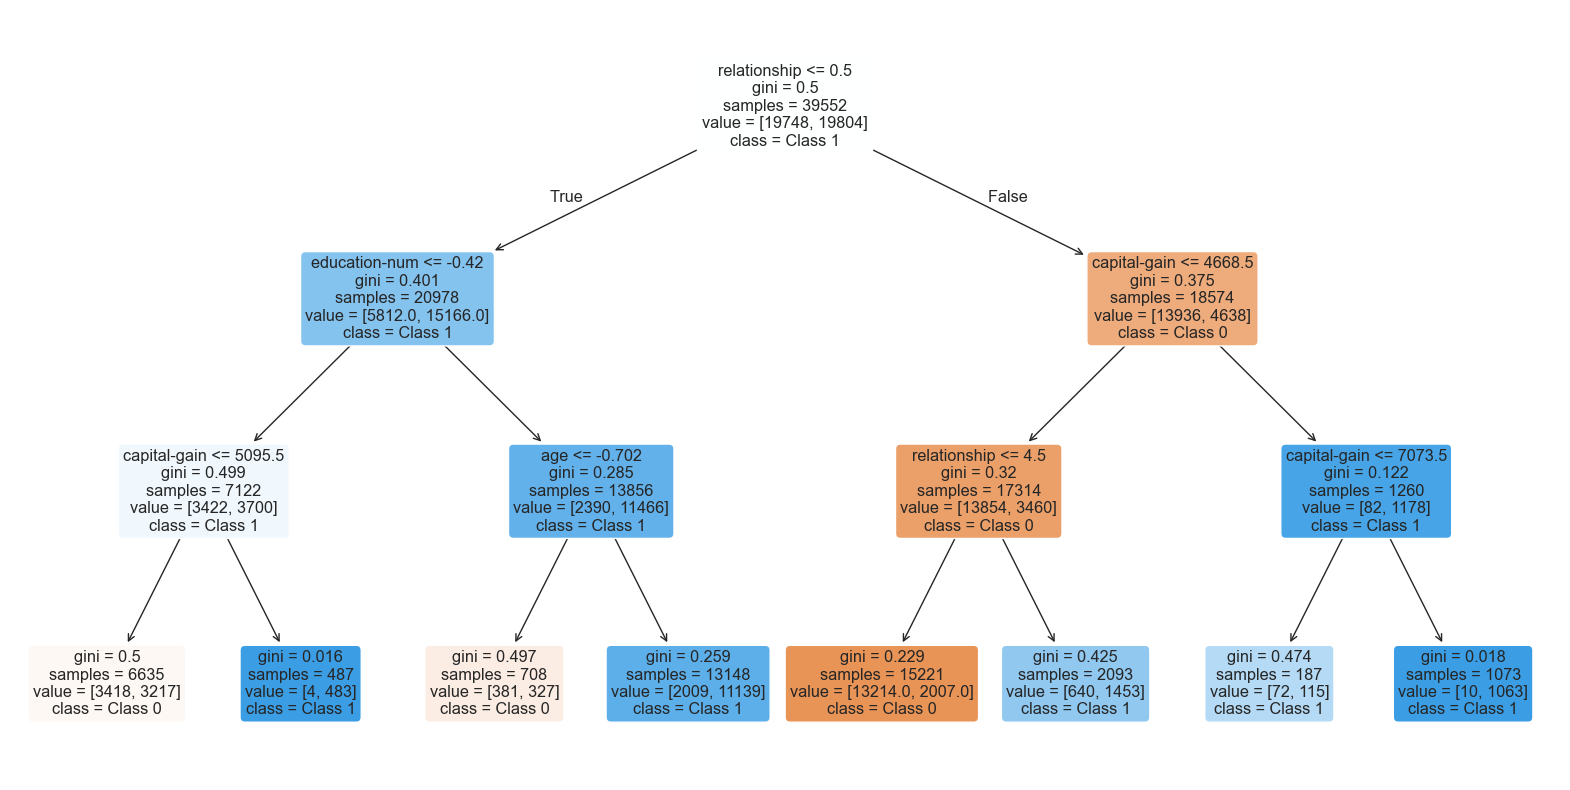

In [40]:
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(clf_tuned, 
          feature_names=X_train.columns,  # Add feature names for clarity
          class_names=['Class 0', 'Class 1'],  # Replace with actual class names if available
          filled=True,  # Add color to nodes
          rounded=True)  # Rounded edges for readability
plt.show()

In [41]:
# Predict on the test set
y_pred = clf_tuned.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate accuracy
accuracy = f1_score(y_test, y_pred)
print(f"f1 score: {accuracy:.4f}")

Accuracy: 0.7921
f1 score: 0.7768


## HyperParameter tunning for Decesion tree - max_depth

In [42]:
scores_global = []
for x in np.arange(2, 25):
    skf = KFold(n_splits=5)
    scores = []
    accuracy_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(max_depth = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores), np.mean(accuracy_scores)))
        
scores_global[:10]

[(np.int64(2), np.float64(0.5379210764996619), np.float64(0.8262340608897496)),
 (np.int64(3), np.float64(0.5892491212596938), np.float64(0.839808565631919)),
 (np.int64(4), np.float64(0.6181985414668358), np.float64(0.8453365618036278)),
 (np.int64(5), np.float64(0.6241096656079236), np.float64(0.8490527544419761)),
 (np.int64(6), np.float64(0.6363687646286834), np.float64(0.8518781327913064)),
 (np.int64(7), np.float64(0.6357945598401473), np.float64(0.8532908761950677)),
 (np.int64(8), np.float64(0.646327452718902), np.float64(0.854611500868986)),
 (np.int64(9), np.float64(0.6509082141882987), np.float64(0.8530145388678324)),
 (np.int64(10), np.float64(0.669165920316011), np.float64(0.8538129420614451)),
 (np.int64(11),
  np.float64(0.6663909466737319),
  np.float64(0.8533523201187873))]

In [43]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1', 'accuracy_score'])
df_res

,max_depth,f1,accuracy_score
0,2,0.537921,0.826234
1,3,0.589249,0.839809
2,4,0.618199,0.845337
3,5,0.624110,0.849053
4,6,0.636369,0.851878
5,7,0.635795,0.853291
6,8,0.646327,0.854612
7,9,0.650908,0.853015
8,10,0.669166,0.853813
9,11,0.666391,0.853352


In [44]:
results = []  # To store results of each experiment

# Define parameter grids
decision_tree_params = [{'max_depth': 2}, {'max_depth': 4}, {'max_depth': 6}]
random_forest_params = [{'n_estimators': 50}, {'n_estimators': 100}]
mlp_params = [{'hidden_layer_sizes': (50,), 'learning_rate': 'constant'},
              {'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'},
              {'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}]

# Experiment with Decision Tree
for params in decision_tree_params:
    skf = KFold(n_splits=5)
    f1_scores, accuracy_scores = [], []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(**params, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    results.append({
        'Algorithm': 'Decision Tree',
        'Parameters': params,
        'F1 Score': np.mean(f1_scores),
        'Accuracy': np.mean(accuracy_scores)
    })

# Experiment with Random Forest
for params in random_forest_params:
    skf = KFold(n_splits=5)
    f1_scores, accuracy_scores = [], []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(**params, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    results.append({
        'Algorithm': 'Random Forest',
        'Parameters': params,
        'F1 Score': np.mean(f1_scores),
        'Accuracy': np.mean(accuracy_scores)
    })

# Experiment with MLP
for params in mlp_params:
    skf = KFold(n_splits=5)
    f1_scores, accuracy_scores = [], []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = MLPClassifier(**params, random_state=13, max_iter=500)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    results.append({
        'Algorithm': 'MLP',
        'Parameters': params,
        'F1 Score': np.mean(f1_scores),
        'Accuracy': np.mean(accuracy_scores)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

       Algorithm                                         Parameters  F1 Score  \
0  Decision Tree                                   {'max_depth': 2}  0.537921   
1  Decision Tree                                   {'max_depth': 4}  0.618199   
2  Decision Tree                                   {'max_depth': 6}  0.636369   
3  Random Forest                               {'n_estimators': 50}  0.676559   
4  Random Forest                              {'n_estimators': 100}  0.677476   
5            MLP  {'hidden_layer_sizes': (50,), 'learning_rate':...  0.610468   
6            MLP  {'hidden_layer_sizes': (50,), 'learning_rate':...  0.610468   
7            MLP  {'hidden_layer_sizes': (100,), 'learning_rate'...  0.611361   

   Accuracy  
0  0.826234  
1  0.845337  
2  0.851878  
3  0.857253  
4  0.857437  
5  0.837198  
6  0.837198  
7  0.835048  


## Lets use K fold

## DecesionTree

In [45]:
skf = KFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    clf_fold = DecisionTreeClassifier(random_state=13)
    clf_fold.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_test_fold)
    scores.append(f1_score(y_test_fold, y_pred_fold))

scores

[np.float64(0.6504792332268371),
 np.float64(0.6517654680919988),
 np.float64(0.6628278950735764),
 np.float64(0.6705276705276705),
 np.float64(0.6649968691296181)]

## 10 splits

In [46]:
## 10 samples 
skf = KFold(n_splits=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    clf_fold = DecisionTreeClassifier(random_state=13)
    clf_fold.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_test_fold)
    scores.append(f1_score(y_test_fold, y_pred_fold))

scores

[np.float64(0.65389369592089),
 np.float64(0.6468253968253969),
 np.float64(0.6626746506986028),
 np.float64(0.6414141414141414),
 np.float64(0.6590765338393422),
 np.float64(0.6666666666666666),
 np.float64(0.6514657980456026),
 np.float64(0.6891290527654164),
 np.float64(0.6623876765083441),
 np.float64(0.6674816625916871)]

## MPL Classifier

In [47]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(5,3), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
scores

[np.float64(0.5915492957746479),
 np.float64(0.5670682730923695),
 np.float64(0.4020379805465493),
 np.float64(0.6208615165539337),
 np.float64(0.5631517960602549)]

## 10 splits

In [48]:
## 10 samples
skf = KFold(n_splits=10, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(5,3), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
scores

[np.float64(0.6144668158090977),
 np.float64(0.543461237274863),
 np.float64(0.5895357406042742),
 np.float64(0.40904806786050896),
 np.float64(0.5990783410138248),
 np.float64(0.6167531504818384),
 np.float64(0.6254392129304287),
 np.float64(0.6164079822616408),
 np.float64(0.6382671480144404),
 np.float64(0.610989010989011)]

## RanfomForest

In [49]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
scores

[np.float64(0.2565864833906071),
 np.float64(0.26483516483516484),
 np.float64(0.2599118942731278),
 np.float64(0.24017957351290684),
 np.float64(0.2490442381212452)]

## 10 splits

In [50]:
skf = KFold(n_splits=19, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
scores

[np.float64(0.23275862068965517),
 np.float64(0.22717149220489977),
 np.float64(0.2375),
 np.float64(0.2938775510204082),
 np.float64(0.2799188640973631),
 np.float64(0.20614035087719298),
 np.float64(0.2807017543859649),
 np.float64(0.26406926406926406),
 np.float64(0.2565217391304348),
 np.float64(0.2892057026476578),
 np.float64(0.25792811839323465),
 np.float64(0.287378640776699),
 np.float64(0.2669683257918552),
 np.float64(0.29473684210526313),
 np.float64(0.23819301848049282),
 np.float64(0.25),
 np.float64(0.2722117202268431),
 np.float64(0.23651452282157676),
 np.float64(0.21238938053097345)]